In [ ]:
import cv2
import pandas as pd
import os
import numpy as np
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam

In [ ]:
input_folder = "/content/drive/MyDrive/spectrograms"
output_folder = "/content/gray"
data = []

In [ ]:
def process_image(image_path, label, target_size=(100, 100)):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(gray_image, target_size)
    normalized_image = resized_image / 255.0
    return normalized_image, label

In [ ]:
for class_name in os.listdir(input_folder):
    class_folder = os.path.join(input_folder, class_name)
    if os.path.isdir(class_folder):
        for filename in os.listdir(class_folder):
            if filename.endswith('.png'):
                image_path = os.path.join(class_folder, filename)
                label = class_name
                processed_image, label = process_image(image_path, label)
                data.append((processed_image, label))

In [ ]:
flat_data = [(pixels.flatten(), label) for pixels, label in data]

In [ ]:
df = pd.DataFrame(flat_data, columns=['pixels', 'label'])

In [ ]:
df = pd.concat([df.drop(['pixels'], axis=1), df['pixels'].apply(pd.Series)], axis=1)

In [ ]:
df.to_csv('data.csv', index=False)

In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
df.head()

,label,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
labels = df['label']
pixels = df.drop(['label'], axis=1)

In [ ]:
x_train_val, x_test, y_train_val, y_test = train_test_split(
    pixels, labels, test_size=0.15, random_state=0
)

x_train, x_val, y_train, y_val = train_test_split(
    x_train_val, y_train_val, test_size=0.1765, random_state=0
)

In [ ]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
8048,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7656,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4074,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4661,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1158,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
image_rows = 100
image_cols = 100
image_shape = (image_rows,image_cols,1)

In [ ]:
x_train = x_train.values.reshape(x_train.shape[0], *image_shape)
x_test = x_test.values.reshape(x_test.shape[0], *image_shape)
x_val = x_val.values.reshape(x_val.shape[0], *image_shape)

In [ ]:
cnn_model = Sequential([
    Conv2D(filters=64,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,
    Flatten(),
    Dense(1024,activation='relu'),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

In [ ]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics =['accuracy'])

In [ ]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=50,
    verbose=0,
    validation_data=(x_val,y_val),
)

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Train - Accuracy')

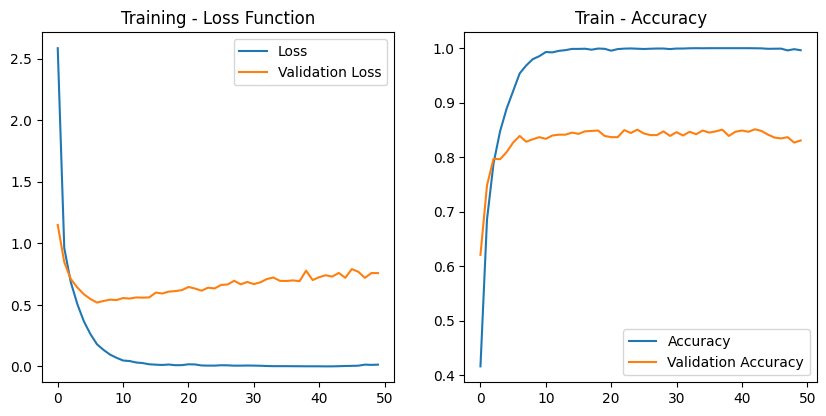

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

score = cnn_model.evaluate(x_val,y_val,verbose=0)
print('Val Loss : {:.4f}'.format(score[0]))
print('Val Accuracy : {:.4f}'.format(score[1]))


Test Loss : 0.7155
Test Accuracy : 0.8412
Val Loss : 0.7586
Val Accuracy : 0.8305


In [ ]:
def model_hyperparameters(filters1=64, kernel_size=3, activation="relu", filters2=1024, dropout=0.5, optimizer="adam",
                          batch_size=128, epochs=50, verbose=1, graph=False):


    cnn_model = Sequential([
    Conv2D(filters1,kernel_size=kernel_size ,activation=activation,input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,
    Flatten(),
    Dense(filters2,activation='relu'),
    Dropout(dropout),
    Dense(10, activation="softmax")
    ])
    cnn_model.compile(loss ='sparse_categorical_crossentropy',
                      optimizer=Adam(learning_rate=0.001),metrics =['accuracy'])


    history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0,
    validation_data=(x_val,y_val))

    print("Training Accuracy:", history.history["accuracy"][epochs-1])
    print("Validation Accuracy:", history.history["val_accuracy"][epochs-1])
    print("Training Loss:", history.history["loss"][epochs-1])
    print("Validation Loss:", history.history["loss"][epochs-1])

    # Evaluate the performance
    loss, acc = cnn_model.evaluate(x_test, y_test)
    print("Loss for Test: ",loss)
    print("Accuracy for Test", acc)

In [ ]:
model_hyperparameters(filters1=128, kernel_size=3, activation="relu", filters2=256, dropout=0.4, optimizer="adam", batch_size=128, epochs=50)

Training Accuracy: 0.9988546967506409
Validation Accuracy: 0.829007625579834
Training Loss: 0.006694388575851917
Validation Loss: 0.006694388575851917
41/41 [==============================] - 0s 7ms/step - loss: 0.8151 - accuracy: 0.8382
Loss for Test:  0.8150683045387268
Accuracy for Test 0.8381679654121399


In [ ]:
model_hyperparameters(filters1=256, kernel_size=3, activation="relu", filters2=256, dropout=0.4, optimizer="adam", batch_size=128, epochs=50)

Training Accuracy: 0.9965641498565674
Validation Accuracy: 0.8267175555229187
Training Loss: 0.011079910211265087
Validation Loss: 0.011079910211265087
41/41 [==============================] - 1s 11ms/step - loss: 0.8305 - accuracy: 0.8275
Loss for Test:  0.8305051922798157
Accuracy for Test 0.8274809122085571


In [ ]:
model_hyperparameters(filters1=128, kernel_size=(3,3), activation="relu", filters2=256, dropout=0.4, optimizer="adam", batch_size=128, epochs=50)

Training Accuracy: 0.9973822236061096
Validation Accuracy: 0.8221374154090881
Training Loss: 0.012457054108381271
Validation Loss: 0.012457054108381271
41/41 [==============================] - 0s 7ms/step - loss: 0.8441 - accuracy: 0.8366
Loss for Test:  0.8440738320350647
Accuracy for Test 0.8366411924362183
